# Shi-tomas拐角检测器和益于跟踪的特征

### 目标
在本章中，
- 我们将学习另一个拐角检测器：Shi-Tomasi拐角检测器
- 我们将看到以下函数：**cv.goodFeaturesToTrack**()

### 理论

在上一章中，我们看到了Harris Corner Detector。1994年下半年，J。Shi和C. Tomasi在他们的论文《**有益于跟踪的特征**》中做了一个小修改，与Harris Harris Detector相比，显示了更好的结果。哈里斯角落探测器的计分功能由下式给出：

$$
R = \lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2
$$

取而代之的是，史托马西提出：

$$
R = min(\lambda_1, \lambda_2)
$$

如果大于阈值，则将其视为拐角。如果像在Harris Corner Detector中那样在$\lambda_1-\lambda_2$空间中绘制它，则会得到如下图像：

![](data/shitomasi_space.png)

从图中可以看到，只有当$\lambda_1$和$\lambda_2$大于最小值$\lambda_{min}$时，才将其视为拐角（绿色区域）。

### 代码

OpenCV有一个函数**cv.goodFeaturesToTrack**()。它通过Shi-Tomasi方法（或哈里斯角检测，如果指定）找到图像中的N个最强角。像往常一样，图像应该是灰度图像。然后，指定要查找的角数。然后，您指定质量级别，该值是介于`0-1`之间的值，该值表示每个角落都被拒绝的最低拐角质量。然后，我们提供检测到的角之间的最小欧式距离。
利用所有这些信息，该功能可以找到图像中的拐角。低于平均质量的所有拐角点均被拒绝。然后，它会根据质量以降序对剩余的角进行排序。然后函数首先获取最佳拐角，然后丢弃最小距离范围内的所有附近拐角，然后返回N个最佳拐角。
在下面的示例中，我们将尝试找到25个最佳弯角： 

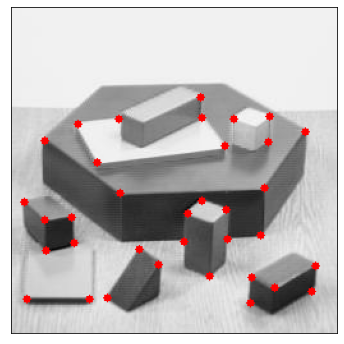

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/blox.jpg')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,35,0.01,10)
corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,(255, 0, 0),-1)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

此功能更适合跟踪。我们将看到使用它的时机
 
### 额外资源

### 练习